<a href="https://colab.research.google.com/github/Rupesh0Poudel/Numerical_Introductory_Seminar/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance


In [2]:
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

[*********************100%***********************]  1 of 1 completed


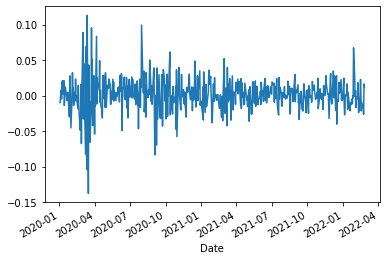

In [3]:
apple = yf.download("AAPL", start = "2020-1-1", end = "2022-2-28")
St = apple['Adj Close']
initial_price = St[-1]
returns = St.pct_change()
ln_returns = np.log(1+ returns)
log_returns = ln_returns[1:543]
log_returns.plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543 entries, 2020-01-02 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       543 non-null    float64
 1   High       543 non-null    float64
 2   Low        543 non-null    float64
 3   Close      543 non-null    float64
 4   Adj Close  543 non-null    float64
 5   Volume     543 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 29.7 KB


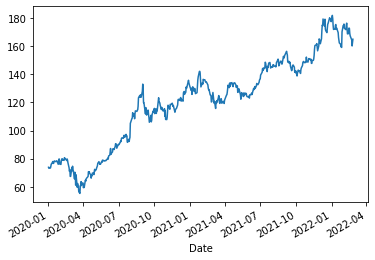

In [12]:
St.plot()
apple.info()

In [4]:
M = 100000
N = 126
nudt = 0 # assuming that only movement of the stock comes from innovation terms
volsdt = log_returns.std()
avg = log_returns.mean()
print(avg, volsdt)
lnS = np.log(initial_price)

0.0014804427509803166 0.023306308483228885


In [5]:
#Random Number Generation
np.random.seed(100)
Z = np.random.normal(size=(N, M))


In [6]:

delta_lnSt = nudt + volsdt*Z
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )
ST = np.exp(lnSt)


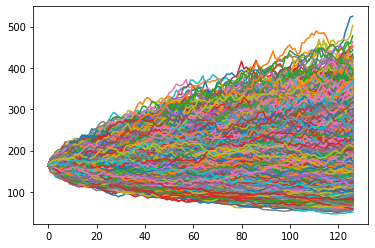

In [7]:
plt.plot(ST)
plt.show()

170.5061586259535 45.33546467343863 100000


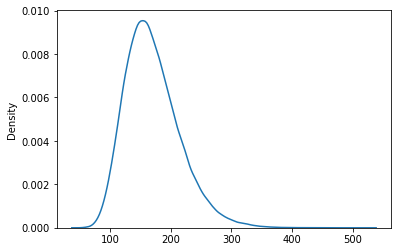

In [23]:
final_day = ST[-1]
sns.kdeplot(final_day)
mean0 = final_day.mean()
se0 = final_day.std()
print(mean0,se0, len(final_day))

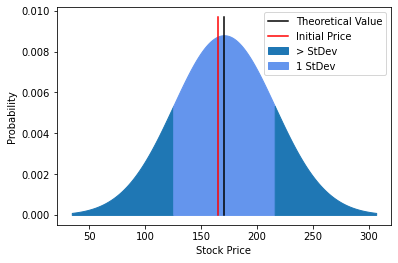

In [9]:
x1 = np.linspace(mean0-3*se0, mean0-1*se0, 100)
x2 = np.linspace(mean0-1*se0,mean0+1*se0,100)
x3 = np.linspace(mean0+1*se0,mean0+3*se0,100)

s1 = stats.norm.pdf(x1, mean0, se0) 
s2 = stats.norm.pdf(x2, mean0, se0)
s3 = stats.norm.pdf(x3, mean0, se0)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev') 
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x3, s3, color='tab:blue') 

plt.plot([mean0,mean0],[0, max(s2)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value
plt.plot([initial_price,initial_price],[0, max(s2)*1.1], 'r', label='Initial Price') # red line plots the market price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot


In [10]:
import numpy as np 
from scipy.stats import t

x =final_day

m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))

(m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) 


(170.2251682669939, 170.7871489849131)

Now, Let's observe the effect of decreased number of simulations. I wanted to increase. But, google colab would crash before I could finish the results.  

In [29]:
Z.shape
Z1 = Z[:, :10000]
Z1.shape


(126, 10000)

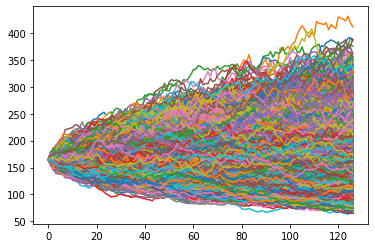

In [19]:

delta_lnSt1 = nudt + volsdt*Z1
lnSt1 = lnS + np.cumsum(delta_lnSt1, axis=0)
lnSt1 = np.concatenate( (np.full(shape=(1, M1), fill_value=lnS), lnSt1) )
ST1 = np.exp(lnSt1)
plt.plot(ST1)
plt.show()
#18 second

170.5037927870644 45.34315677490555


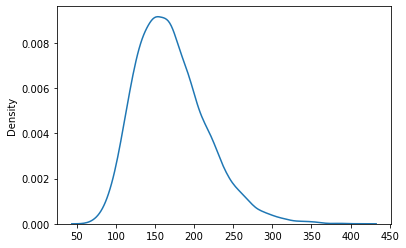

In [22]:
final_day1 = ST1[-1]
sns.kdeplot(final_day1)
mean01 = final_day1.mean()
se01 = final_day1.std()
print(mean01,se01)

In [24]:
print(final_day1.max(), final_day1.min())
x1 =final_day1

m1 = x1.mean() 
s1 = x1.std() 
dof1 = len(x1)-1 
confidence = 0.95

t_crit1 = np.abs(t.ppf((1-confidence)/2,dof1))

(m1-s1*t_crit1/np.sqrt(len(x1)), m1+s1*t_crit1/np.sqrt(len(x1))) 

411.17766923607553 65.05987481303923


(169.6149756549969, 171.39260991913193)

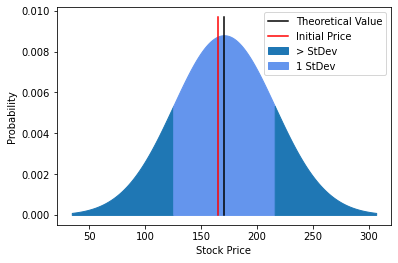

In [25]:
x11 = np.linspace(mean01-3*se01, mean01-1*se01, 100)
x21 = np.linspace(mean01-1*se01,mean01+1*se01,100)
x31 = np.linspace(mean01+1*se01,mean01+3*se01,100)

s11 = stats.norm.pdf(x11, mean01, se01) 
s21 = stats.norm.pdf(x21, mean01, se01)
s31 = stats.norm.pdf(x31, mean01, se01)

plt.fill_between(x11, s11, color='tab:blue',label='> StDev') 
plt.fill_between(x21, s21, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x31, s31, color='tab:blue') 

plt.plot([mean01,mean01],[0, max(s21)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value
plt.plot([initial_price,initial_price],[0, max(s21)*1.1], 'r', label='Initial Price') # red line plots the market price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot

I just showed you the impact of changing the number of simulation in the results of the monte carlo simulation. Let me check the impact of having a different random number generator. Lagged fibonacci generator will generate uniform random number.

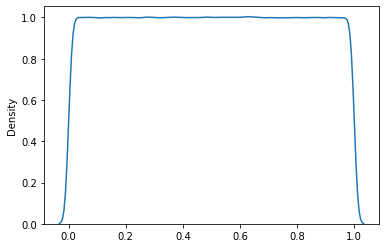

In [30]:
#Lagged Fibonacci Generator For Uniform Random Numbers

# parameter settings
nn   = 18
a    = 1366
b    = 150889
M    = 714025
seed = 123456
n    = 12600000 + 1
yy = []
yy.append(seed)   
i    = 1

# Main computation
while i <= nn:
    yy.append( (a * yy[i - 1] + b) % M)
    i  = i + 1

y = [x / M for x in yy]
i=19

while i <= n + 18:
    zeta = y[i - 12] - y[i - 5]
    if zeta < 0:
        zeta = zeta + 1
    
    y.append(zeta)
    i = i + 1

U3   = y[19:n + 18]
n1  = n - 2
n2  = n - 1

sns.kdeplot(U3) 


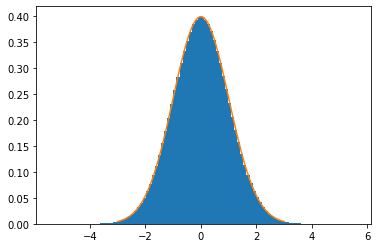

In [31]:
#Box Müller Method _ Youtube channel StatMonteCarlo

import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def fcos(theta, E):
  #return [np.cos(theta), np.sin(theta)] * np.sqrt(2*E)
  return np.cos(theta) * np.sqrt(2*E)
  

def BoxMuller(N, mu = 0, sigma = 1 ):
  out = np.zeros(N)
  for j in range(N):
    #theta = rd.uniform(low = 0, high = 2*np.pi, size = 1)
    theta = 2*np.pi * U3[j]
    E = rd.exponential(scale = 1/1, size = 1)
    Y = fcos(theta,E)
    out[j] = mu + Y* sigma
  return out
plt.figure()
Y = BoxMuller(12600000)
plt.hist(Y, bins=100, density=True)
xd=np.linspace(-3,3,100)
plt.plot(xd,stats.norm.pdf(xd))
Norm1 = Y
#for distribution with mean unequal to 0 and sigma unequal to 1, run the phi module
#and use the following code to plot the outline instead for mean 5 and sigma 2
#plt.plot(xd,phi(xd,5,2))

#characteristics function for arbitrary mu and sigma for normal distribution

#def phi(X, mu, sigma):
#  return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

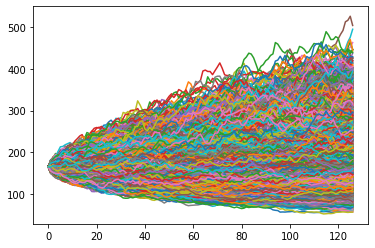

In [32]:
M2 = 100000
N2 = 126
Z2 = np.reshape(Norm1, (N2,M2))
delta_lnSt2 = nudt + volsdt*Z2
lnSt2 = lnS + np.cumsum(delta_lnSt2, axis=0)
lnSt2 = np.concatenate( (np.full(shape=(1, M2), fill_value=lnS), lnSt2 ) )
ST2 = np.exp(lnSt2)
plt.plot(ST2)
plt.show()


170.38174319602825 45.302338302531105


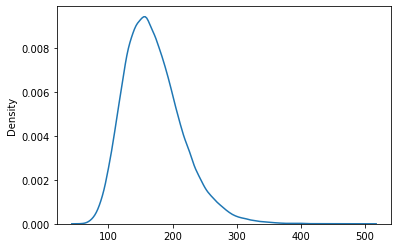

In [33]:
final_day2 = ST2[-1]
sns.kdeplot(final_day2)
mean02 = final_day2.mean()
se02 = final_day2.std()
print(mean02,se02)

In [34]:
print(final_day2.max(), final_day2.min())
x2 =final_day2

m2 = x2.mean() 
s2 = x2.std() 
dof2 = len(x2)-1 
confidence = 0.95

t_crit2 = np.abs(t.ppf((1-confidence)/2,dof2))

(m2-s2*t_crit2/np.sqrt(len(x2)), m2+s2*t_crit2/np.sqrt(len(x2))) 

504.44725873846886 56.285505183940785


(170.10095815515504, 170.66252823690147)

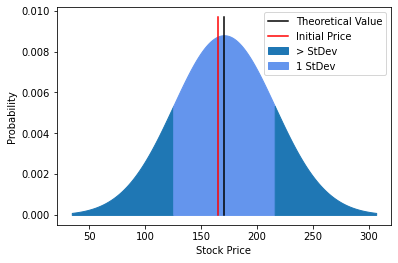

In [35]:
x12 = np.linspace(mean02-3*se02,mean02-1*se02,100)
x22 = np.linspace(mean02-1*se02,mean02+1*se02,100)
x32 = np.linspace(mean02+1*se02,mean02+3*se02,100)

s12 = stats.norm.pdf(x12, mean02, se02) 
s22 = stats.norm.pdf(x22, mean02, se02)
s32 = stats.norm.pdf(x32, mean02, se02)

plt.fill_between(x12, s12, color='tab:blue',label='> StDev') 
plt.fill_between(x22, s22, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x32, s32, color='tab:blue') 

plt.plot([mean02,mean02],[0, max(s22)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value
plt.plot([initial_price,initial_price],[0, max(s22)*1.1], 'r', label='Initial Price') # red line plots the market price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot

Remaining: Check MSE and Variance of density
find confidence intervals



https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b for confidence interval

In [27]:
import statsmodels.api as sm

c2 = final_day1
c1 = np.random.normal(loc = 0 , scale =1 , size = 10000)

dens_c = sm.nonparametric.KDEMultivariateConditional(endog=[c1], exog=[c2], dep_type='c', indep_type='c', bw='normal_reference')
dens_c.bw

array([ 0.22706431, 10.35502021])